# Optimization (tutorial)

In this tutorial you will learn to code and use common optimization algorithms for static models.

Thomas Gazel-Anthoine

In [1]:
using Pkg
Pkg.add("Optim")
Pkg.add("NLsolve")


   Updating registry at `C:\Users\thoma\.juliapro\JuliaPro_v1.4.1-1\registries\JuliaPro`
  Resolving package versions...
   Updating `C:\Users\thoma\OneDrive\Escritorio\cours\ECO\ECO309\eco309\Project.toml`
 [no changes]
   Updating `C:\Users\thoma\OneDrive\Escritorio\cours\ECO\ECO309\eco309\Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `C:\Users\thoma\OneDrive\Escritorio\cours\ECO\ECO309\eco309\Project.toml`
 [no changes]
   Updating `C:\Users\thoma\OneDrive\Escritorio\cours\ECO\ECO309\eco309\Manifest.toml`
 [no changes]


In [141]:
using Plots


---

## Profit optimization by a monopolist

A monopolist produces quantity $q$ of goods X at price $p$. Its cost function is $c(q) = 0.5 + q (1-qe^{-q})$

The consumer's demand for price $p$ is $x(p)=2 e^{-0.5 p}$ (constant elasticity of demand to price).

__Write down the profit function of the monopolist and find the optimal production (if any). Don't use any library except for plotting.__



Since $q=x(p)= 2e^{-0.5p}$, monopolist price with respect to quantity is $p = y(q)= 2 ln(2)- 2 ln(q)$.

Monopolist profit is $\Pi(p) = px(p) - c(x(p))$ or equivalently:
$$
\Pi(q) = q y(q)- c(q) = q(2ln(2)-1) -2qln(q) + q^2e^{-q} -0.5
$$

To find the maximum we use the Newton algorithm for $\Pi'$. We thus need to compute $\Pi'$ and $\Pi''$:
$$
\Pi'(q) =  (2ln(2)-1) - 2 -2ln(q)  + 2qe^{-q} - q^2e^{-q}
$$
and 
$$
\Pi''(q) =  -\frac{2}{q} + 2e^{-q} - 2qe^{-q} - 2qe^{-q} + q^2e^{-q} =  -\frac{2}{q} + 2e^{-q} -4qe^{-q} + q^2e^{-q}
$$

In [123]:
function demand(p)
    return 2*exp(0.5*p)
end

function cost(q)
    return 0.5 + q*(1-q*exp(-q))
end

function profit(p)
    return p*demand(p)- cost(demand(p))
end

function price(q)
    return 2log(2)- 2log(q)
end
    

price (generic function with 1 method)

In [129]:
function profit(q)
    return q*(2log(2) -1) -2q*log(q) + q^2*exp(-q)-0.5
end

function profitp(q)
    return (2log(2) -1)-2 -2*log(q) + 2q*exp(-q)- q^2*exp(-q)
end

function profitpp(q)
    return -2/q + 2*exp(-q)- 4q*exp(-q) + q^2*exp(-q)
end

profitpp (generic function with 1 method)

In [130]:
function MaxNewton(q0)
    i=2
    q =[q0,q0]
    while (abs(q[i]-q[i-1])>10^-5 || i==2) && i<100
        push!(q, q[i] - profitp(q[i])/profitpp(q[i])) 
        i +=1
        
    end
    return q
end

MaxNewton (generic function with 1 method)

In [131]:
q = MaxNewton(0.2)

7-element Array{Float64,1}:
 0.2
 0.2
 0.411459218160962
 0.5433923073054137
 0.5616284201359363
 0.5618593323810641
 0.5618593676638836

In [132]:
size(MaxNewton(0.2))

(7,)

In [133]:
price(last(q))

2.5393017528720563

Therefore the optimal monopolist price is roughly $p=2.54$ and the quantity produced $0.56$.

---

## (modified) Solow model

This model tries to explain long-term productivity, its relation to productivity and the speed of convergence.

The setup is the following:

- a country accumulates capital $k_t$
- population $n_t$ grows at rate $g$ (so that $n_{t+1}=g n_t$)
- capital and labour are combined to produce $y_t = A F(k_t, n_t)$ where $A>0$ is total factor productivity.
- capital depreciates at rate $\delta \in ]0,1[$. Its law of motion is $k_{t+1}=\delta k_{t}+i_{t}$ where $i_t$ is the amount invested at time $t$
- production is either consumed or invested: $y_t = c_t + i_t$

We choose a Cobb-Douglas specification with constant returns to scale $F(k_t, n_t) = A k_t^{\alpha} n_t^{1-\alpha}$.

In the Ramsey–Cass–Koopmans  model (also called neoclassical growth model), a representative agent would choose $c_t$ in every period so as to maximize an intertemporal utility like $\sum_{t \geq 0} \beta^t U(c_t)$ where $\beta \in [0,1[$ is a time discount and $U(x)=\frac{x^{1-\gamma}}{1-\gamma}$ is the instantaneous felicity.

Here we follow the Solow-Swan specification and assume instead there is a fixed fraction $s\in[0,1[$ of income in every period, which is saved and invested in every period. In other words investment (or savings) is given by:

$$i_t = s y_t$$

As a result, the dynamic of capital and all other variables will be backward looking and can be simulated easily.

__Calibrate parameters $\beta$, $\delta$ and $g$, that is, propose plausible values for them, from the litterature, or by matching some observable fact.__

The Solow model is a very widely used model. Depending on which countries and situations we are looking at parameters may take different values. 

Although the agents are assumed to not die, evolution of capital is studied over long period and it is reasonable to assume $\beta$ is low ($0.4$ for example), as humans do not invest a lot of their income over multiple decades. Therefore savings rate can be expected to be fairly low (here $s=0.2$).

When looking at develloped countries (even though the Solow model has shown limitation for such case studies), we can assume that population growth is fairly low (France is at 0.2% growth) and consequently choose $g=1$ i.e. population size stagnates.

Similarly in such countries, capital includes complex machines (computers, servers...) and installations and we can expect that such equipement depreciates a bit (because of usage, obsolecence...). For the following part we take $\delta = 0.8$ but it may change.

__Detrend the equations of the model w.r.t. population growth. Denote the detrended variables with a hat (in the code we assume all variables are detrended and ignore the hat).__

We modify the model to consider per capita variables, defined with the hat.

We thus have:
$$
\hat{y}_t = \frac{y_{t}}{n_{t}} = \frac{A k_t^\alpha n_t^{1-\alpha }}{n_t}\\
\quad = A k_t^\alpha n_t^{-\alpha}\\
= A \hat{k}_t^\alpha 
$$
And since $k_{t+1} = k_t + i_t = k_t + sy_t$ and $n_{t+1}= gn_t$:
$$
\hat{k}_{t+1} = \frac{k_{t+1}}{n_{t+1}} = \frac{\delta k_t + sy_t}{n_{t+1}}\\
= \frac{1}{g}\frac{\delta k_t + sy_t}{n_{t}}\\
= \frac{\delta \hat{k}_t + s\hat{y}_t}{g}
$$

Our goal is to compute the steady-state and assess its stability.

__Compute a function `f` which returns the capital $\hat{k}_{t+1}$ as a function of $\hat{k_t}$. It is suggested to define `f(k::Float64, p::Dict{Symbol, Float64})` where `p` is a dictionary of parameters.__

 (note: such a dictionary can be defined as `p = Dict(:a=>0.9, :b=>4)` and accessed with brackets `p[:a]` or `p[:b]`) (note2: symbols like `:a` or `:b` are lightweight string. The content must be a valid julia identifier so that it is valid to write `a=p[:a]`)

In [233]:
function f(k::Float64, s=0.3,A=0.5,a=0.2,g=1., d=0.8)
    return d*k/g + s*A*k^a/g
end

f (generic function with 9 methods)

__Starting from an initial level $\hat{k}_0$ compute successive iterates of `f` to find the long-run level $\overline{k}$ of capital per capita. (Bonus: produce a nice plot of the convergence)__

In [234]:
function fs(k0, its, s=0.3,A=0.5,a=0.2,g=1., d=0.8)
    k=[k0]
    for i in 1:its
        push!(k, f(k[i], s,A,a,g, d))
    end
    return k
end

fs (generic function with 6 methods)

In [235]:
appr = fs(5., 20)
aps = size(appr)[1]

21

In [236]:
pl1 = [abs(appr[i] - appr[i-1]) for i in 3:aps]
pl2 = [abs(appr[i-1] - appr[i-2]) for i in 3:aps]

pr = [pl1[i]/pl2[i] for i in 1:aps-2]

19-element Array{Float64,1}:
 0.21350073237557624
 0.2383377762684099
 0.28052166496139463
 0.3205268186748544
 0.34367195663359074
 0.35379834107830155
 0.3577228043988376
 0.3591742982615341
 0.3597019750141188
 0.35989261061349326
 0.35996132679610887
 0.35998607595829657
 0.3599949871275589
 0.35999819534348426
 0.35999935030092844
 0.35999976612953194
 0.3599999159271522
 0.35999996980123855
 0.35999998788819626

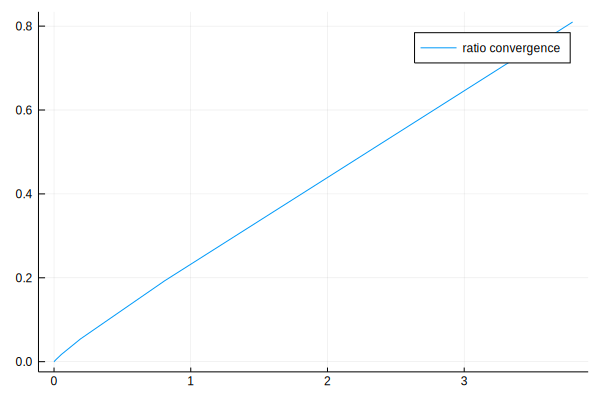

In [237]:
plot(pl2, pl1, label="ratio convergence" )

We have linear convergence. The convergence ratio depends on the different parameters.

__What factors affect the steady-state level of capital?__

Since we have:
$$
\hat{k}_{t+1} = \frac{\delta \hat{k}_t + s\hat{y}_t}{g} = \frac{\delta \hat{k}_t + sA\hat{k}_t^\alpha}{g}
$$

It is clear that parameters $\delta$, $s$, $A$, $g$, $\alpha$ affect the steady state. Indeed $A$ and $\alpha$, through output, and $s$ define the savings and thus influence the level of capita. Similarly $\delta$ is the rate at which the capital depreciates and is thus important in the steady state of capital. The effect of $g$ is also important in two ways: it increases output as population is more important but also reduces capital per capita, which is the dominationg factor. Capital steady-state level increases with $g$ but per capita capital steady-state level decreases with $g$.

__Study the stability of $f$ around $\overline{k}$. Which factors affect the speed of convergence towards the steady-state?__

In [238]:
s0 , A0, a0, g0, d0  = 0.3 ,0.5 ,0.2 ,1. ,0.8

(0.3, 0.5, 0.2, 1.0, 0.2)

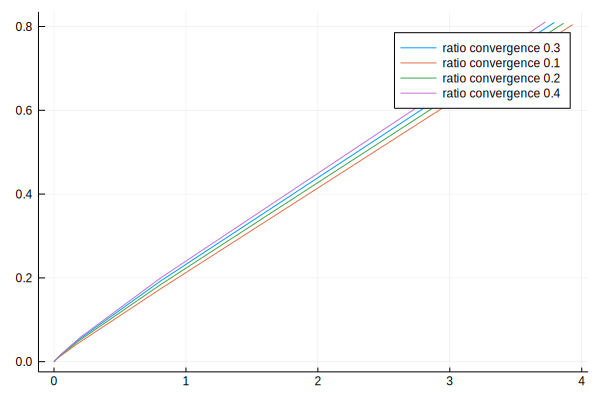

In [239]:
pr1 = plot(pl2, pl1, label="ratio convergence $s0" )
for s in [0.1, 0.2, 0.4]
    appri = fs(5., 20, s, A0, a0, g0, d0)
    apsi = size(appr)[1]
    pl1i = [abs(appri[i] - appri[i-1]) for i in 3:apsi]
    pl2i = [abs(appri[i-1] - appri[i-2]) for i in 3:apsi]
    plot!(pl2i, pl1i, label="ratio convergence $s" )
end
plot(pr1)

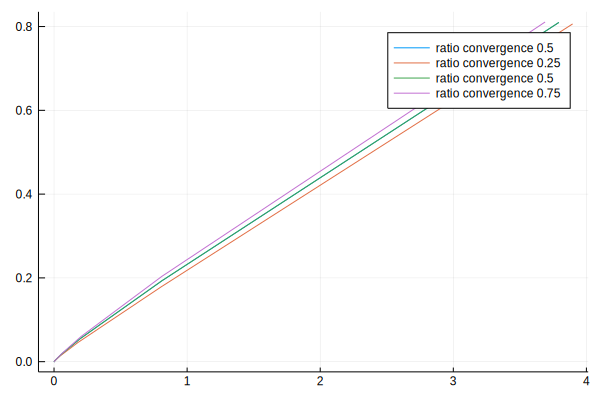

In [240]:
pr1 = plot(pl2, pl1, label="ratio convergence $A0" )
for A in [0.25, 0.5, 0.75]
    appri = fs(5., 20, s0, A, a0, g0, d0)
    apsi = size(appr)[1]
    pl1i = [abs(appri[i] - appri[i-1]) for i in 3:apsi]
    pl2i = [abs(appri[i-1] - appri[i-2]) for i in 3:apsi]
    plot!(pl2i, pl1i, label="ratio convergence $A" )
end
plot(pr1)

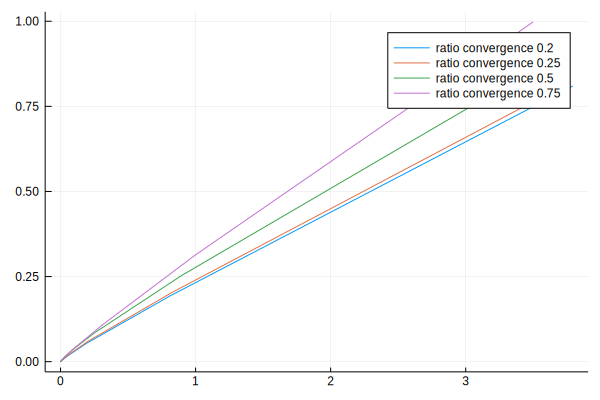

In [241]:
pr1 = plot(pl2, pl1, label="ratio convergence $a0" )
for a in [0.25, 0.5, 0.75]
    appri = fs(5., 20, s0, A0, a, g0, d0)
    apsi = size(appr)[1]
    pl1i = [abs(appri[i] - appri[i-1]) for i in 3:apsi]
    pl2i = [abs(appri[i-1] - appri[i-2]) for i in 3:apsi]
    plot!(pl2i, pl1i, label="ratio convergence $a" )
end
plot(pr1)

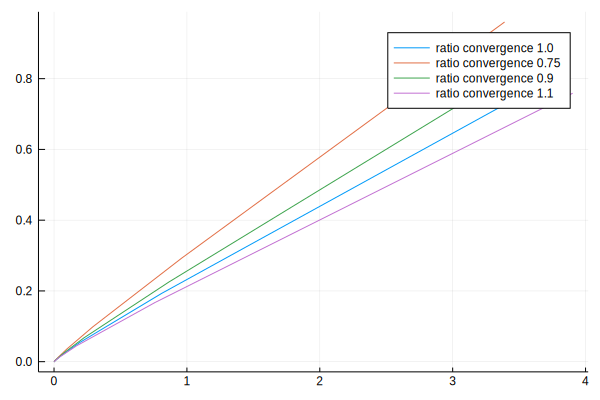

In [242]:
pr1 = plot(pl2, pl1, label="ratio convergence $g0" )
for g in [0.75, 0.9, 1.1]
    appri = fs(5., 20, s0, A0, a0, g, d0)
    apsi = size(appr)[1]
    pl1i = [abs(appri[i] - appri[i-1]) for i in 3:apsi]
    pl2i = [abs(appri[i-1] - appri[i-2]) for i in 3:apsi]
    plot!(pl2i, pl1i, label="ratio convergence $g" )
end
plot(pr1)

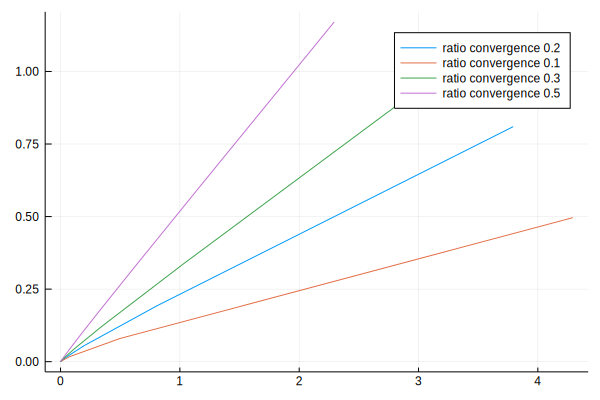

In [245]:
pr1 = plot(pl2, pl1, label="ratio convergence $d0" )
for d in [0.5, 0.7, 0.9]
    appri = fs(5., 20, s0, A0, a0, g0, d)
    apsi = size(appr)[1]
    pl1i = [abs(appri[i] - appri[i-1]) for i in 3:apsi]
    pl2i = [abs(appri[i-1] - appri[i-2]) for i in 3:apsi]
    plot!(pl2i, pl1i, label="ratio convergence $d" )
end
plot(pr1)

From the observation of this simple non-exhaustive plot, the main model parameters that seem to affect speed of convergence are $d$, $g$ and $a$, in a less important manner. Higher $d$, lower $g$, and higher $a$ increase the ratio of convergence.

__Compute the steady-state directly using a Newton method and compare convergence speed.__

The per capita steady state $\bar{k}$ is defined by:
$$
\bar{k} = \frac{\delta \bar{k} + sA\bar{k}^\alpha}{g}
$$
Consider $f$:
$$
g(x) = x - \frac{\delta x + sAx^\alpha}{g}
$$
Solve for the roots of $f$ with Newton, using:
$$
g'(x) = 1- \frac{\delta}{g}  + \frac{\alpha sAx^{\alpha-1}}{g}
$$

In [135]:
function g(x, s=0.3,A=0.5,a=0.2,g=1., d=0.8)
    return x- (d*x+s*A*x^a)/g
end

function gp(x, s=0.3,A=0.5,a=0.2,g=1., d=0.8)
    return 1- (d+a*s*A*x^(a-1))/g
end

gp (generic function with 6 methods)

In [255]:
function Newton(x0)
    i=2
    x = [x0,x0]
    while (abs(x[i]-x[i-1])>10^-14 || i==2) && i<100
        push!(x, x[i] - g(x[i])/gp(x[i]))
        i +=1
        
    end
    return x
end

Newton (generic function with 1 method)

In [256]:
apprN = Newton(5.)
apsN =size(apprN)[1]

8

In [261]:
pl1N = [abs(apprN[i] - apprN[i-1]) for i in 4:apsN]
pl2N = [abs(appr[i-1] - apprN[i-2]) for i in 4:apsN]

prN = [pl1N[i]/pl2N[i] for i in 1:apsN-3]

5-element Array{Float64,1}:
 0.024194456863593342
 0.025016316827884463
 6.458135891324237e-5
 1.193260532717281e-10
 8.732338491911798e-16

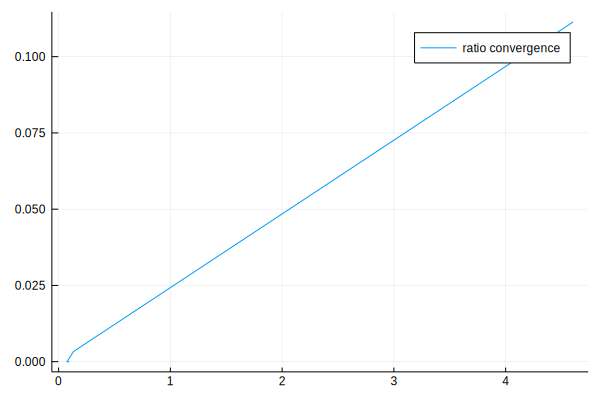

In [264]:
plot(pl2N, pl1N, label="ratio convergence")

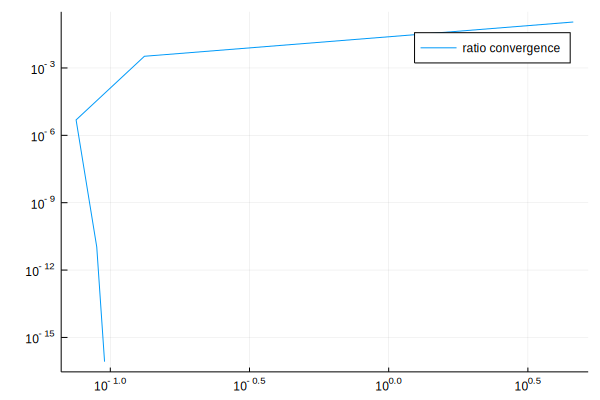

In [265]:
plot(pl2N, pl1N, label="ratio convergence",  xaxis=:log, yaxis=:log )

Convergence is much better. Although the number of points to converge is low even for high levels of precision rendering any illustration complicated, convergence is supralinear (Newton's method is quadratic).

__Suppose one tries to maximize steady-state consumption by choosing saving rate $s$. Which value would one choose?__

Per capita steady-state consumption is defined by:
$$
\bar{c} = (1-s)\bar{y} = (1-s)A\bar{k}^\alpha
$$

The steady-state per capita capital can be derived from the previous identity:
$$
\bar{k} = \frac{\delta \bar{k} + sA\bar{k}^\alpha}{g}
$$
Using the given identity:
$$
g= \delta + sA\bar{k}^{\alpha-1}\\
\bar{k}^{\alpha-1}=\frac{g -\delta}{sA}\\
\bar{k}=\left(\frac{g -\delta}{sA}\right)^{\frac{1}{\alpha-1}}\\
$$
and thus:
$$
\bar{c} =(1-s)A\left(\frac{g -\delta}{sA}\right)^{\frac{\alpha}{\alpha-1}}
$$
We have:
$$
\frac{\partial \bar{c}}{\partial s} = -A\left(\frac{g -\delta}{sA}\right)^{\frac{\alpha}{\alpha-1}} + (1-s)A\frac{\alpha-1}{\alpha}\left(\frac{g -\delta}{A}\right)^{\frac{\alpha}{\alpha-1}} s^\frac{\alpha-1}{\alpha}
$$

One should thus choose the value that maximizes $\bar{c}$. Here this is equivalent to solving $\frac{\partial \bar{c}}{\partial s} =0$. The result can either be computed analytically or numerically, with Newton method for example.

__(Bonus) Suppose an agent is given the intertemporal utility from the Ramsey–Cass–Koopmans model but chooses saving rate once for all. Which saving rate would one choose? Is it the same for all initial levels of capital?__



---

## Exercise: constrained optimization

Consider the function $f(x,y) = 1-(x-0.5)^2 -(y-0.3)^2$.

__Use Optim.jl to minimize $f$ without constraint. Check you understand diagnostic information returned by the optimizer.__

In [7]:
using Optim

In [8]:
function f(z)
    return 1-(z[1]-0.5)^2 - (z[2]-0.3)^2
end

f (generic function with 2 methods)

In [9]:
x0 = [0.0, 0.0]
optimize(f, x0)

 * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Minimizer: [-1.86e+154, 2.93e+153]
    Minimum:   -Inf

 * Found with
    Algorithm:     Nelder-Mead
    Initial Point: [0.00e+00, 0.00e+00]

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≰ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    1000
    f(x) calls:    2630


__Now, consider the constraint $x<0.3$ and maximize $f$ under this new constraint.__

In [10]:
g(z) = -f(z)

function dg(G, z)
    G[1] =2(z[1]-0.5)
    G[2] =2(z[2]-0.3)
end 

lower = [-Inf, -Inf]
upper = [0.3, Inf]
x0 = [0.0, 0.0]

optimize(g, lower, upper, x0)

 * Status: success

 * Candidate solution
    Minimizer: [3.00e-01, 3.00e-01]
    Minimum:   -9.600000e-01

 * Found with
    Algorithm:     Fminbox with L-BFGS
    Initial Point: [0.00e+00, 0.00e+00]

 * Convergence measures
    |x - x'|               = 0.00e+00 ≤ 0.0e+00
    |x - x'|/|x'|          = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|         = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 0.00e+00 ≤ 0.0e+00
    |g(x)|                 = 4.00e-01 ≰ 1.0e-08

 * Work counters
    Seconds run:   1  (vs limit Inf)
    Iterations:    7
    f(x) calls:    1097
    ∇f(x) calls:   1097


__Reformulate the problem as a root finding with lagrangians. Write the complementarity conditions.__

The Lagrangian with the constraint is $L(x,y) = f(x,y) - \lambda (x-0.3) = 1-(x-0.5)^2 -(y-0.3)^2 - \lambda (x-0.3) $, with the condition $\lambda\geq 0$.

Karush-Kuhn-Tucker conditions are:
$$
-2(x-0.5) - \lambda = 0
$$
$$
-2(y-0.3) = 0
$$
$$
\lambda (x-0.3) = 0
$$
$$
\lambda \geq 0
$$

__Solve using NLSolve.jl__

In [11]:
using NLsolve

In [12]:
function T(G, z)
    G[1] =2(z[1]-0.5)
    G[2] =2(z[2]-0.3)
end 

mcpsolve(T, [-Inf, -Inf], [0.3, Inf], [ 0., 0.])

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0]
 * Zero: [0.3000000000003685, 0.3]
 * Inf-norm of residuals: 0.000000
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 5

In [13]:
function L(G, z)
    G[1] =-2(z[1]-0.5)- z[3]
    G[2] =-2(z[2]-0.3)
    G[3] = z[3]*(z[1]- 0.3)
end 

#nlsolve(L, [ 0., 0., 0.])
mcpsolve(L, [-Inf, -Inf, 0.], [Inf, Inf, Inf], [ 0., 0., 0.1])

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.1]
 * Zero: [0.29999999983209774, 0.3, 0.40000000033580446]
 * Inf-norm of residuals: 0.000000
 * Iterations: 7
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 8
 * Jacobian Calls (df/dx): 8

---

## Consumption optimization

A consumer has preferences $U(c_1, c_2)$ over two consumption goods $c_1$ and $c_2$.

Given a budget $I$, consumer wants to maximize utility subject to the budget constraint $p_1 c_1 + p_2 c_2 \leq I$.

We choose a Stone-Geary specification where

$U(c_1, c_2)=\beta_1 \log(c_1-\gamma_1) + \beta_2 \log(c_2-\gamma_2)$

__Write the Karush-Kuhn-Tucker necessary conditions for the problem.__

Karush-Kuhn-Tucker necessary conditions are:
$$
\beta_1 \frac{1}{c_1- \gamma_1} - \lambda p_1=0
$$
$$
\beta_2 \frac{1}{c_2- \gamma_2} - \lambda p_2=0
$$
$$
\lambda (p_1c_1 + p_2c_2 - I) = 0
$$
$$
\lambda \geq 0
$$

__Verify the KKT conditions are sufficient for optimality.__

We are maximizing and we have $U$ concave as the logarithm is concave, which is equivalent to minimization of convex functions. Since the constraint is affine and thus also convex and we can easily verify there exist some point respecting the constraint (take $(0,0)$), the problem verifies Slater conditions and KKT conditions are sufficient for optimality.

__Derive analytically the demand functions, and the shadow price.__

From the first and second equations we have:
$$
\lambda = \frac{\beta_1}{p_1} \frac{1}{c_1- \gamma_1} = \frac{\beta_2}{p_2} \frac{1}{c_2- \gamma_2}
$$

Therefore $\lambda \neq 0$ and:
$$
c_2= \frac{\beta_2}{\beta_1}\frac{p_1}{p_2}(c_1-\gamma_1) + \gamma_2
$$

Since the budget constraint is binding, as $\lambda \neq 0$, we derive the demand functions:
$$
p_1c_1 + p_2c_2 - I = 0 \\
p_1c_1 + p_1\frac{\beta_2}{\beta_1}(c_1-\gamma_1) + p_2\gamma_2 - I = 0 \\
p_1c_1 (1 + \frac{\beta_2}{\beta_1})   = I - p_2\gamma_2 + p_1\frac{\beta_2}{\beta_1}\gamma_1 \\
c_1  = \frac{\beta_1}{\beta_1 +\beta_2} \left(\frac{I}{p_1} - \frac{p_2}{p_1}\gamma_2 + \frac{\beta_2}{\beta_1}\gamma_1 \right) 
$$
And similarly:
$$
c_2  = \frac{\beta_2}{\beta_1 +\beta_2} \left(\frac{I}{p_2} - \frac{p_1}{p_2}\gamma_2 + \frac{\beta_1}{\beta_2}\gamma_1 \right)
$$


__Interpret this problem as a complementarity problem and solve it using NLSolve.__

Since it is clear we need $\lambda>0$ for the problem to make sense we force a non-zero value of $\lambda$. Indeed it seems that for too small values of $\lambda$ allowed the minimizer chooses a close to $0$ value for $\lambda$. The mininmizer does not seem to return a good estimate in many cases.

In [216]:
I=10.
b1, b2 = 1., 1.
g1, g2 = 0., 0.
p1, p2 = 1., 1.

function L(G, z)
    G[1] = -b1*1/(z[1]-g1)+ z[3]*p1
    G[2] = -b2*1/(z[2]-g2)+ z[3]*p2
    G[3] = z[3]*(p1*z[1] + p2*z[2]- I)
end 

#nlsolve(L, [ g1+0.1, g2+0.1, 0.])
mcpsolve(L, [g1, g2, 0.15], [Inf, Inf, Inf],  [ g1+0.1, g2+0.1, 0.2])

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.1, 0.1, 0.2]
 * Zero: [4.99999999999976, 4.99999999999976, 0.20000000000000911]
 * Inf-norm of residuals: 0.000000
 * Iterations: 12
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 13
 * Jacobian Calls (df/dx): 13

__Produce some nice graphs with isoutility curves, the budget constraint and the optimal choice.__

